# ****Titanic data****

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import acquire
import prepare
from acquire import get_titanic_data
from prepare import prep_titanic_data
from prepare import clean_titanic_data
import warnings
warnings.filterwarnings('ignore')


# import splitting and imputing functions
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

import seaborn as sns


In [2]:
# acquire the data
df = get_titanic_data()
# prepare the data
train, validate, test = prep_titanic_data(df)

# Exercises

Using the titanic data, in your classification-exercises repository, create a notebook, **model.ipynb** where you will do the following:



In [3]:
titanic = acquire.get_titanic_data()

train, validate, test = prepare.prep_titanic_data(df)

In [4]:
df.head().T

,0,1,2,3,4
passenger_id,0,1,2,3,4
survived,0,1,1,1,0
pclass,3,1,3,1,3
sex,male,female,female,female,male
age,22.0,38.0,26.0,35.0,35.0
sibsp,1,1,0,1,0
parch,0,0,0,0,0
fare,7.25,71.2833,7.925,53.1,8.05
embarked,S,C,S,S,S
class,Third,First,Third,First,Third


In [5]:
# drop out non-numerical columns or non-encoded version remaining in this data set
df = df.drop(columns=['deck', 'class', 'embark_town', 'passenger_id'])

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [7]:
df.columns.to_list()

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'alone']

In [8]:
numcols = [col for col in df.columns if df[col].dtype != 'O']

In [9]:
catcols = [col for col in df.columns if df[col].dtype == 'O']

In [10]:
catcols

['sex', 'embarked']

In [11]:
for col in catcols:
    print(f"Columns: {col}")
    print(df[col].value_counts())
    print("----------")
    print(df[col].value_counts(normalize=True, dropna=False))
    print("=============")

Columns: sex
male      577
female    314
Name: sex, dtype: int64
----------
male      0.647587
female    0.352413
Name: sex, dtype: float64
Columns: embarked
S    644
C    168
Q     77
Name: embarked, dtype: int64
----------
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64


survived


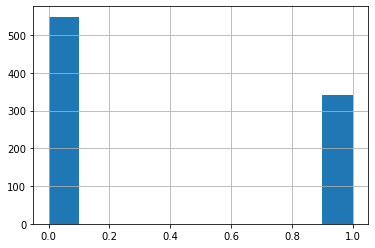

pclass


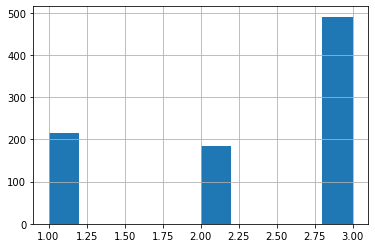

age


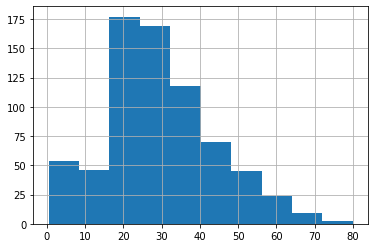

sibsp


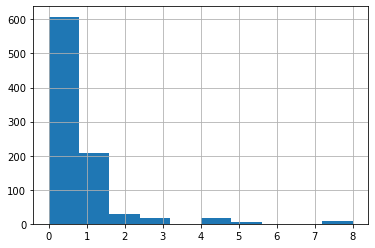

parch


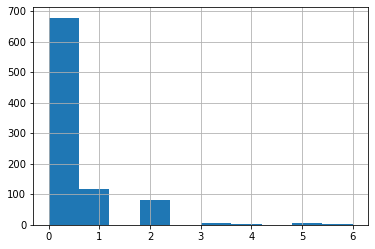

fare


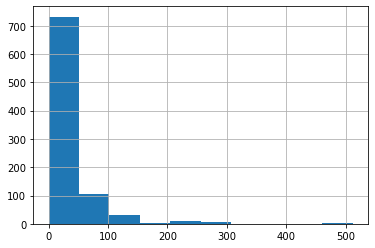

alone


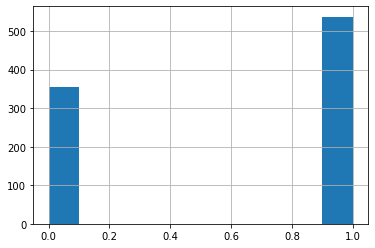

In [12]:
# histograms of numeric columns 
for col in numcols:
    print(col)
    df[col].hist()
    plt.show()

In [13]:
dummy_df = pd.get_dummies(df[['sex', 'embarked']], dummy_na=False, drop_first=[True, True])

In [14]:
dummy_df.head()

,sex_male,embarked_Q,embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [15]:
# Concatenate my dummy_df to my data

data = pd.concat([df, dummy_df], axis=1)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,1,0,1
887,1,1,female,19.0,0,0,30.0000,S,1,0,0,1
888,0,3,female,NaN,1,2,23.4500,S,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,1,1,0,0


In [16]:
df = data.drop(columns=['sex', 'embarked'])

In [17]:
df.head(2).T

,0,1
survived,0.00,1.0000
pclass,3.00,1.0000
age,22.00,38.0000
sibsp,1.00,1.0000
parch,0.00,0.0000
fare,7.25,71.2833
alone,0.00,0.0000
sex_male,1.00,0.0000
embarked_Q,0.00,0.0000
embarked_S,1.00,0.0000


In [18]:
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]


In [19]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [20]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

In [21]:
imputer = imputer.fit(df[['age']])
df[['age']] = imputer.transform(df[['age']])

In [22]:
validate[['age']]= imputer.transform(validate[['age']])

In [23]:
test[['age']]= imputer.transform(test[['age']])

In [24]:
def impute_age(train, validate, test):
    '''
    Imputes the mean age of trrain to all three databases
    '''
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    imputer = imputer.fit(train[['age']])
    train[['age']] = imputer.transform(train[['age']])
    validate[['age']]= imputer.transform(validate[['age']])
    test[['age']]= imputer.transform(test[['age']])
    return train, validate, test

**Blend the clean, split and impute functions into a single prep_data() function.**

In [25]:
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_q,embarked_s
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [26]:
df.isna().sum()

survived      0
pclass        0
age           0
sibsp         0
parch         0
fare          0
alone         0
sex_male      0
embarked_q    0
embarked_s    0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   alone       891 non-null    int64  
 7   sex_male    891 non-null    uint8  
 8   embarked_q  891 non-null    uint8  
 9   embarked_s  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.3 KB


In [28]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=12345)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [29]:
# What is your baseline prediction? 


In [30]:
# Fit the decision tree classifier to your training sample and transform

In [31]:
# Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [32]:
# Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [33]:
# Run through steps 2-4 using a different max_depth value.



In [34]:
# Which model performs better on your in-sample data?



In [35]:
# Which model performs best on your out-of-sample data, the validate set?



**Train Model**

Create the object
- Create the Decision Tree object with desired hyper-parameters.

In [36]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)


**Fit the model**

Fit the random forest algorithm to the training data.

In [37]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)


**Visualize a Decision Tree**
By visualizing the decision tree, we can see the relative importance of different features. The most important features will be the first splits, and we can see how many observations in each category remain after each split.

[Text(362.7, 332.955, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(181.35, 237.825, 'pclass <= 2.5\ngini = 0.388\nsamples = 175\nvalue = [46, 129]\nclass = 1'),
 Text(90.675, 142.695, 'age <= 2.5\ngini = 0.12\nsamples = 94\nvalue = [6, 88]\nclass = 1'),
 Text(45.3375, 47.565, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(136.0125, 47.565, 'gini = 0.103\nsamples = 92\nvalue = [5, 87]\nclass = 1'),
 Text(272.025, 142.695, 'fare <= 23.35\ngini = 0.5\nsamples = 81\nvalue = [40, 41]\nclass = 1'),
 Text(226.6875, 47.565, 'gini = 0.478\nsamples = 66\nvalue = [26, 40]\nclass = 1'),
 Text(317.3625, 47.565, 'gini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = 0'),
 Text(544.05, 237.825, 'age <= 5.5\ngini = 0.31\nsamples = 323\nvalue = [261, 62]\nclass = 0'),
 Text(453.375, 142.695, 'sibsp <= 2.5\ngini = 0.408\nsamples = 14\nvalue = [4, 10]\nclass = 1'),
 Text(408.03749999999997, 47.565, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = 1')

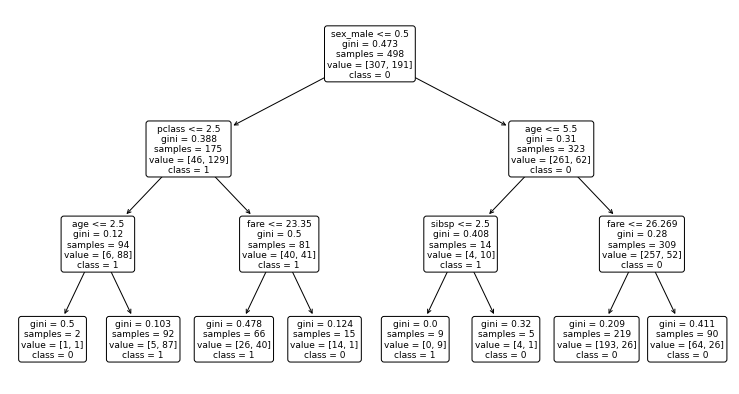

In [38]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)


**Make Predictions**

Classify each flower by its estimated species.

In [39]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 0])

**Estimate Probability**

Estimate the probability of each species, using the training data.

In [40]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.88127854, 0.11872146],
       [0.71111111, 0.28888889],
       [0.88127854, 0.11872146],
       [0.05434783, 0.94565217],
       [0.88127854, 0.11872146]])

# **Evaluate Model**

**Compute the Accuracy**

Remember that Accuracy is the number of correct predictions over the number of total instances that have been evaluated.

In [41]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.83


In [42]:
# confusion matrix

confusion_matrix(y_train, y_pred)


array([[276,  31],
       [ 55, 136]])

In [43]:
y_train.value_counts()


0    307
1    191
Name: survived, dtype: int64

In [44]:
import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


,0,1
0,276,31
1,55,136


**Create a classificaiton report**

Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. 
T
P
(
T
P
+
F
P
)

Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. 
T
P
(
T
P
+
F
N
)

f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better. 
∈
[
0
,
1
]

Support: number of occurrences of each class in where y is true.

In [45]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.87       307
           1       0.81      0.71      0.76       191

    accuracy                           0.83       498
   macro avg       0.82      0.81      0.81       498
weighted avg       0.83      0.83      0.82       498



In [46]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.80


In [47]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       132
           1       0.76      0.71      0.73        82

    accuracy                           0.80       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214




# **Random Forest**

**Exercises**

Continue working in your model file with titanic data to do the following:

After making a few models, which one has the best performance (or closest metrics) on both train and validate?


In [48]:
# 1. Fit the Random Forest classifier to your training sample 
# and transform (i.e. make predictions on the training sample) 
# setting the random_state accordingly and setting 
# min_samples_leaf = 1 and max_depth = 10.

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = df

In [51]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [52]:
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=123)

In [53]:
print(rf.feature_importances_)

[0.08259707 0.24356198 0.04242034 0.03577321 0.23728241 0.01636972
 0.30631402 0.00990244 0.02577881]


In [54]:
y_pred = rf.predict(X_train)


In [55]:
y_pred_proba = rf.predict_proba(X_train)


In [56]:
# 2. Evaluate your results using the model score, confusion matrix, 
# and classification report.

In [57]:
# model score
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))


Accuracy of random forest classifier on training set: 0.95


In [58]:
# confusion matrix
print(confusion_matrix(y_train, y_pred))


[[303   4]
 [ 21 170]]


In [59]:
# classification report
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96       307
           1       0.98      0.89      0.93       191

    accuracy                           0.95       498
   macro avg       0.96      0.94      0.95       498
weighted avg       0.95      0.95      0.95       498



In [60]:
# 3. Print and clearly label the following: 
TP = 303
FP = 21
FN = 4
TN = 170
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.9497991967871486
True Positive Rate: 0.9869706840390879
False Positive Rate: 0.1099476439790576
True Negative Rate: 0.8900523560209425
False Negative Rate: 0.013029315960912053
Precision: 0.9351851851851852
Recall: 0.9869706840390879
F1 Score: 0.960380348652932
Support (0): 307
Support (1): 191


In [61]:
# 4. Run through steps increasing your min_samples_leaf and 
# decreasing your max_depth.

In [62]:

for i in range(1, 31):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()


Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.808050    0.737143  0.783133    0.772596      0.780854
recall       0.850163    0.675393  0.783133    0.762778      0.783133
f1-score     0.828571    0.704918  0.783133    0.766745      0.781146
support    307.000000  191.000000  0.783133  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.831715    0.735450  0.795181    0.783582      0.794794
recall       0.837134    0.727749  0.795181    0.782441      0.795181
f1-score     0.834416    0.731579  0.795181    0.782997      0.794974
support    307.000000  191.000000  0.795181  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.833837    0.814371  0.827309    0.824104      0.826371
recall       0.899023    0.712042  0.827309    0.805532      0.827309
f1-score     

Tree with max depth of 25
                    0           1  accuracy   macro avg  weighted avg
precision    0.977636    0.994595  0.983936    0.986115      0.984140
recall       0.996743    0.963351  0.983936    0.980047      0.983936
f1-score     0.987097    0.978723  0.983936    0.982910      0.983885
support    307.000000  191.000000  0.983936  498.000000    498.000000

Tree with max depth of 26
                    0           1  accuracy   macro avg  weighted avg
precision    0.977636    0.994595  0.983936    0.986115      0.984140
recall       0.996743    0.963351  0.983936    0.980047      0.983936
f1-score     0.987097    0.978723  0.983936    0.982910      0.983885
support    307.000000  191.000000  0.983936  498.000000    498.000000

Tree with max depth of 27
                    0           1  accuracy   macro avg  weighted avg
precision    0.977636    0.994595  0.983936    0.986115      0.984140
recall       0.996743    0.963351  0.983936    0.980047      0.983936
f1-score  

In [63]:
metrics = []

for i in range(1, 31):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.783133,0.761682,0.021450
1,2,0.795181,0.771028,0.024153
2,3,0.827309,0.803738,0.023571
3,4,0.835341,0.808411,0.026930
4,5,0.863454,0.817757,0.045697
5,6,0.879518,0.799065,0.080453
6,7,0.901606,0.808411,0.093195
7,8,0.919679,0.827103,0.092576
8,9,0.941767,0.799065,0.142702
9,10,0.953815,0.817757,0.136058


In [64]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


,max_depth,train_accuracy,validate_accuracy,difference
7,8,0.919679,0.827103,0.092576
4,5,0.863454,0.817757,0.045697
3,4,0.835341,0.808411,0.026930
6,7,0.901606,0.808411,0.093195
2,3,0.827309,0.803738,0.023571
5,6,0.879518,0.799065,0.080453
1,2,0.795181,0.771028,0.024153
0,1,0.783133,0.761682,0.021450


In [65]:
# 5. What are the differences in the evaluation metrics? 
# Which performs better on your in-sample data? 
Max depth of 3 preforms better with the sample data.
# Why?
It has the smallest difference between train and validate accuracy.



SyntaxError: invalid syntax (3338041450.py, line 3)